In [1]:
%matplotlib inline
import numpy as np
import torch
from torch.utils.serialization import load_lua
import os
import scipy.io as sio
import cv2
import math
from matplotlib import pyplot as plt

In [2]:
TRAIN_DATA_DIR = '/Data/nruiz9/data/facial_landmarks'
AFLW = os.path.join(TRAIN_DATA_DIR, 'AFLW2000')

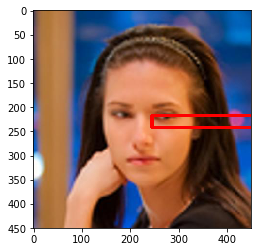

['roi', 'Shape_Para', 'pt3d_68', 'Pose_Para', 'Exp_Para', '__header__', '__globals__', 'Color_Para', 'Illum_Para', 'pt2d', '__version__', 'Tex_Para']
[[ -1.65866122e-01   1.28811941e-01  -1.13544129e-02   2.45219864e+02
    2.17786331e+02  -9.71238174e+01   1.32105139e-03]]
7.38038054445
[[197  73 293 169]]


In [3]:
img_name = 'image00559'
img_path = os.path.join(AFLW, img_name + '.jpg')
mat_path = os.path.join(AFLW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

roi = mat['roi'][0]

cv2.rectangle(img, (mat['Pose_Para'][0][3], mat['Pose_Para'][0][4]), (roi[0] + roi[2], roi[1] + roi[3]), (255,0,0),5)

plt.imshow(img)
plt.show()
print mat.keys()
print mat['Pose_Para']

print mat['Pose_Para'][0][1] * 180 / np.pi
print mat['roi']

[-0.2248862236738205, 0.002951401984319091, -0.06389492750167847, 224.56297302246094, 235.01658630371094, -113.41862487792969, 0.0016186352586373687]
-0.224886 -0.0029514 -0.0638949
((299.2562330725226, 150.77855990968209), (159.14065038944511, 305.947432087511), (149.12026336753766, 193.46575844844401), 149.56297302246094, 160.01658630371094)


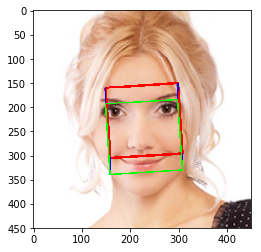

In [40]:
# For pose we have [pitch yaw roll tdx tdy tdz scale_factor]
from math import cos, sin

img_name = 'image01224'
img_path = os.path.join(AFLW, img_name + '.jpg')
mat_path = os.path.join(AFLW, img_name + '.mat')

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
mat = sio.loadmat(mat_path)

frame = img
pose_params = mat['Pose_Para'][0]

print pose_params.tolist()
pitch, yaw, roll, tdx, tdy, tdz, scale = pose_params

size = 150

p = pitch
y = -yaw
r = roll

if y < 0:
    face_x = tdx - 0.50 * size
    face_y = tdy - 0.50 * size
else:
    face_x = tdx - 0.50 * size
    face_y = tdy - 0.50 * size
    

print p, y ,r

x1 = size * (cos(y) * cos(r)) + face_x
y1 = size * (cos(p) * sin(r) + cos(r) * sin(p) * sin(y)) + face_y

x2 = size * (-cos(y) * sin(r)) + face_x
y2 = size * (cos(p) * cos(r) - sin(p) * sin(y) * sin(r)) + face_y

x3 = size * (sin(y)) + face_x
y3 = size * (-cos(y) * sin(p)) + face_y

print((x1, y1), (x2, y2), (x3, y3), face_x, face_y)
# Draw base in red
cv2.line(frame, (int(face_x), int(face_y)), (int(x1),int(y1)),(255,0,0),3)
cv2.line(frame, (int(face_x), int(face_y)), (int(x2),int(y2)),(255,0,0),3)
cv2.line(frame, (int(x2), int(y2)), (int(x2+x1-face_x),int(y2+y1-face_y)),(255,0,0),3)
cv2.line(frame, (int(x1), int(y1)), (int(x1+x2-face_x),int(y1+y2-face_y)),(255,0,0),3)
# Draw pillars in blue
cv2.line(frame, (int(face_x), int(face_y)), (int(x3),int(y3)),(0,0,255),2)
cv2.line(frame, (int(x1), int(y1)), (int(x1+x3-face_x),int(y1+y3-face_y)),(0,0,255),2)
cv2.line(frame, (int(x2), int(y2)), (int(x2+x3-face_x),int(y2+y3-face_y)),(0,0,255),2)
cv2.line(frame, (int(x2+x1-face_x),int(y2+y1-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,0,255),2)
# Draw top in green
cv2.line(frame, (int(x3+x1-face_x),int(y3+y1-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,255,0),2)
cv2.line(frame, (int(x2+x3-face_x),int(y2+y3-face_y)), (int(x3+x1+x2-2*face_x),int(y3+y2+y1-2*face_y)),(0,255,0),2)
cv2.line(frame, (int(x3), int(y3)), (int(x3+x1-face_x),int(y3+y1-face_y)),(0,255,0),2)
cv2.line(frame, (int(x3), int(y3)), (int(x3+x2-face_x),int(y3+y2-face_y)),(0,255,0),2)

# Draw bounding box

plt.imshow(frame)
plt.show()